In [ ]:
import math
import random
import numpy as np
import pandas as pd
def evaluate(x): ##計算ackley fuction的值
  return -20 * math.exp(-0.2*np.sqrt(np.mean(np.square(x))))-math.exp(np.mean(np.cos(2*np.pi*x)))+20+np.exp(1)

In [ ]:
p_num = 64  ##粒子個數
max_iteration = 10 ##迭代次數
max_run = 30
w = 0.5
c1 = 2
c2 = 2
upper_bound = 32.768  ##上下界
lower_bound = -32.768
record = np.zeros((max_run, max_iteration), dtype='float')
for l in range(max_run):


  
  x = np.random.uniform(low = lower_bound, high = upper_bound, size = (3,p_num))  ##初始化隨機生成座標
  y = [evaluate(x[:,i]) for i in range(p_num)]  ##計算每個粒子的好壞
  x[2,:] = y
  V = np.zeros((2,p_num))
  Pb = np.concatenate((np.zeros((2,p_num)), -np.log(np.zeros((1,p_num)))))  ##初始化每個粒子最好的位置
  Gb = np.array([0,0,np.Inf])  ##紀錄所有粒子經歷過最好的位置


  
  for i in range(max_iteration):
    for j in range(p_num):
      if Pb[2,j] > x[2,j]:
        Pb[:,j] = x[:,j]
    if Gb[2] > min(Pb[2,:]): 
      Gb = Pb[:, np.argmin(Pb[2,:])]
    for j in range(p_num):
      for k in range(2):
        V[k,j] = w * V[k,j] + c1 * random.uniform(0,1) * (Pb[k,j] - x[k,j]) + c2 * random.uniform(0,1) * (Gb[k] - x[k,j])  ##計算速度
        x[k,j] += V[k,j]  ##更新位置
        if x[k,j] > upper_bound:  ##若超過上下界，則放在邊界
          x[k,j] = upper_bound
        elif x[k,j] < lower_bound:
          x[k,j] = lower_bound
      x[2,j] = evaluate(x[0:2,j])
    if i == (max_iteration-1):  ##最後一次更新
      for j in range(p_num):
        if Pb[2,j] > x[2,j]:
          Pb[:,j] = x[:,j]
      if Gb[2] > min(Pb[2,:]): 
        Gb = Pb[:, np.argmin(Pb[2,:])]
    record[l,i] = Gb[2]
    print(i,Gb)

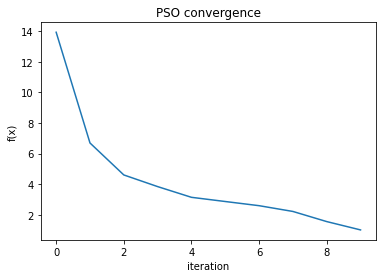

In [ ]:
import matplotlib.pyplot as plt
average_record = np.mean(record, axis = 0) ##取30次平均
plt.title('PSO convergence')
plt.xlabel('iteration')
plt.ylabel('f(x)')
plt.plot(range(max_iteration), average_record, '-') ##畫出收斂圖